# <center>Статистические модели прогнозирования
# <center>Скользящее среднее
Для получения элементарного случая скользящего среднего проще всего взять среднее арифметическое двух последних наблюдений. Мы получим новый временной ряд, каждый член которого — среднее арифметическое двух соседних значений исходного ряда:
$$ MA_t = \frac{X_{t-1} + X_t}{2} $$
Чуть более продвинутый способ — усреднить сразу несколько наблюдений. Это так называемое **простое скользящее среднее (Simple Moving Average, SMA)**:
$$ SMA_t = \frac{X_{t-q+1} + \dots X_t}{q} $$
Таким образом, в скользящем среднем мы суммируем несколько последовательных точек временного ряда и делим эту сумму на количество самих точек, то есть считаем математическое усреднение за определённый период.

Количество точек для суммирования определяется **размером окна (q)**. Чем больше размер, тем больше данные сглаживаются.  
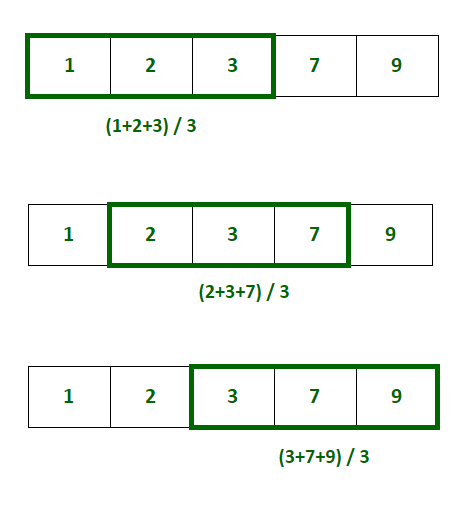

Для сглаживания мы будем использовать встроенный метод `pandas.Series.rolling()` — он принимает на вход параметр `window` и ожидает после себя агрегирующую функцию для сглаживания (обычно используется среднее). Из преимуществ этого метода можно отметить простоту реализации и интерпретации, из недостатков — чувствительность.

Посмотрим на некоторый временной ряд и результаты применения сглаживания к нему:  
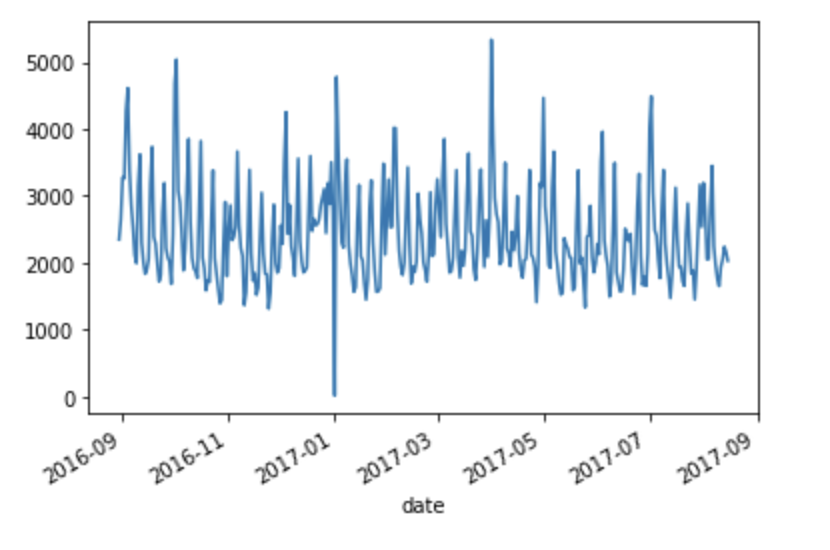

Скользящее среднее с узким окном (размер окна — два дня) неэффективно борется с выбросами.  
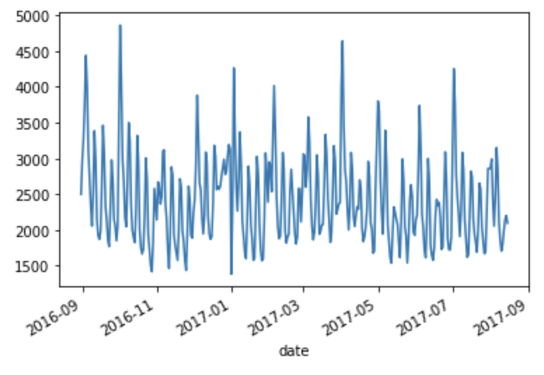

Скользящее среднее с широким окном (размер окна — 30 дней) может привести к потере информации, сгладив полезную информацию.  
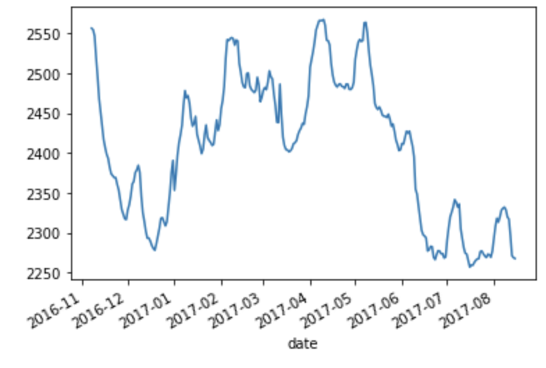

На данном графике с окном размера 15 есть прослеживающийся период и изменение амплитуды с течением времени.  
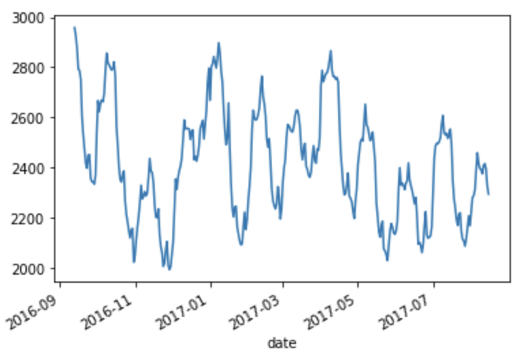

Модель скользящего среднего порядка (ширина окна) $q$ обозначается как $MA(q)$, а предсказание строится как значение белого шума в момент времени $t(\varepsilon_t)$ + скользящее среднее с окном размера $q$ (вычисляется как $\theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}$):
$$ X_t = \alpha + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q} $$
где $\alpha$ и $\theta_q$ — неизвестные параметры, которые настраиваются в процессе обучения.

Скользящее среднее редко используется как самостоятельная модель, но иногда помогает избавить ряд от выбросов и лишнего шума, чтобы упростить визуальный анализ.


# <center>ARMA и ARIMA
>**ARMA** — это авторегрессионное скользящее среднее, или модель авторегрессии-скользящего среднего. В ней $p$ **авторегрессионных слагаемых** и $q$ **слагаемых скользящего среднего шумовой компоненты**:

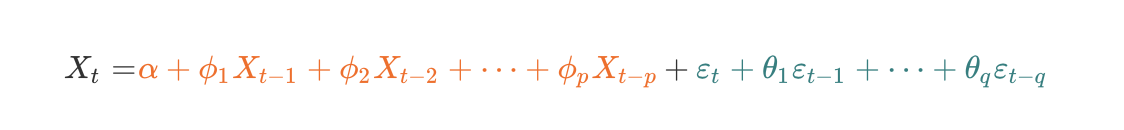

Таким образом ARMA объединяет преимущества двух ранее изученных методов и имеет два параметра:

* $p$ — параметр авторегрессионной модели $AR(p)$;
* $q$ — параметр скользящего среднего $MA(q)$.

Параметр $p$ мы определяли по графику частичной автокорреляции. Параметр $q$ для скользящего среднего определяют так же, но по коррелограмме (графику автокорреляции).

>**ARIMA** расшифровывается как *Autoregressive Integrated Moving Average* и включает в себя ещё один параметр ($d$), который означает, что дифференцирование временного ряда порядка $d$ приводит ряд к стационарности и будет подчиняться модели ARMA.

>$d$ — это  порядок дифференцирования, который приводит нестационарный ряд к стационарности. Это значит, что даже если наш ряд нестационарный, мы можем сделать его стационарным путём взятия разностей. Запомнив получившееся количество дифференцирований, можно смело применять к нему ARIMA.

И *ARMA*, и *ARIMA* реализованы на *Python* в классе `statsmodels.tsa.arima.model.ARIMA`. Данному классу необходимо передать в качестве параметров временной ряд и порядок `order` (`ARIMA(data, order=(2, 0, 0))`). Для параметра `order` нужно указать $p$, $d$ и $q$ (именно в таком порядке), причём для получения *ARMA* необходимо указать `d=0`.

Резюмируем:
* Если ряд стационарный, используем *ARMA*.
* Если ряд нестационарный (имеет тренд), с помощью дифференцирования определяем порядок $d$ и используем *ARIMA*.



# <center>SARIMA
Модель *ARIMA* отлично учитывает и тренд (благодаря скользящему среднему), и зависимость от предыдущих значений (благодаря авторегрессии), но в ней не хватает учёта сезонности. В таком случае можно добавить к *ARIMA* учёт сезонности, и тогда мы получим следующую модель — сезонную *ARIMA*, или **SARIMA (Seasonal ARIMA)**.

Эта модель очень похожа на *ARIMA*, за исключением того, что в ней есть дополнительный набор компонентов авторегрессии и скользящего среднего.

*SARIMA* позволяет различать данные по сезонной частоте, а также по их несезонным отличиям. Нахождение лучших для модели параметров можно упростить с помощью средств автоматического поиска, таких как [auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html).

# <center>SARIMAX и ARIMAX
Что если месяц или день недели тоже имеет значение? Или, например, на курс рубля, помимо даты и предыдущих значений, также влияют курсы других валют?

Последней статистической моделью, с которой мы познакомимся, будет **SARIMAX**. Её отличие от предыдущей версии заключается в том, что, помимо данных временного ряда, она учитывает **экзогенные переменные** (те переменные, которые могут влиять на значения временного ряда). Таким образом мы сможем учитывать не только зависимости внутри данных, но и внешние факторы.

Для запуска моделей *SARIMA* и *SARIMAX* на *Python* нужно воспользоваться классом `statsmodels.tsa.statespace.sarimax.SARIMAX`. Если вы хотите использовать *SARIMA*, необходимо задать два обязательных параметра — `order` и `seasonal_order`.

`order` — это порядок для модели ($ARIMA(p, d, q)$). В `seasonal_order` необходимо передать ещё четыре параметра:
* `P` — сезонный авторегрессионный порядок;
* `D` — порядок дифференцирования сезонного ряда;
* `Q` — порядок сезонной скользящей средней;
* `m` — размер сезонного периода.

Если размер сезонного периода `m` можно определить по сезонной компоненте (мы уже раскладывали ряд на компоненты ранее — `seasonal_decompose`), то остальные параметры удобнее определять автоперебором.

Для учёта экзогенных переменных необходимо передать в класс *SARIMAX* параметр exog=x. В x должны находиться другие временные ряды, например курс доллара (x), который может влиять на курс рубля (y), или пометка, является ли каждая из дат праздничным днём.

Хороший пример реализации SARIMAХ приведён в [официальной документации](https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_faq.html).

**ARIMAX**, в отличие от *SARIMAX*, *ARIMAX* не учитывает сезонную составляющую, но имеет все преимущества *ARIMA* и учитывает экзогенные переменные.



**КАК СРАВНИВАТЬ ЭТИ МОДЕЛИ?**

Одним из распространённых способов является сравнение качества моделей по **критерию Акаике (AIC)**. Этот информационный критерий вознаграждает модель за качество приближения обученного временного ряда к фактическому, а также «штрафует» её за использование излишнего количества параметров. Принято считать, что модель с наименьшим значением критерия *AIC* является наилучшей.

Для оценки модели критерием *AIC* необязательно пользоваться дополнительными методами. Этот критерий, как и другая информация, отображается после обучения модели при вызове встроенного метода `fit_model.summary()`.

**КАК ВЫБРАТЬ ПОДХОДЯЩУЮ МОДЕЛЬ?**
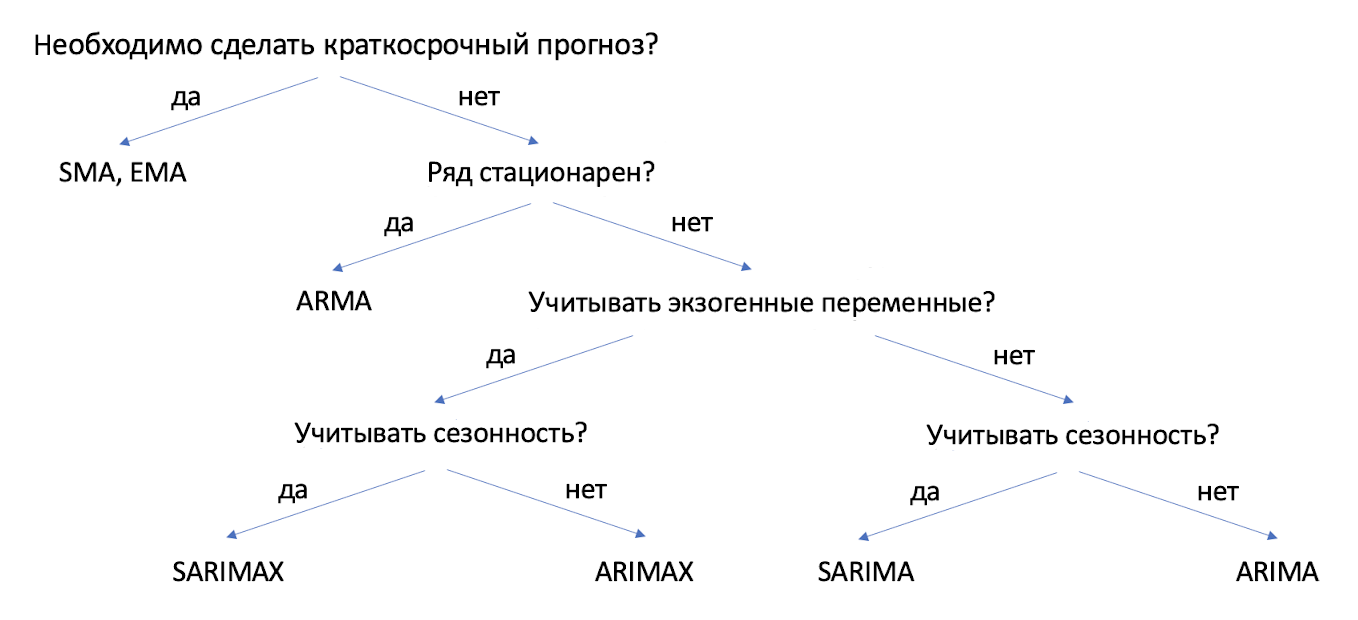


# <center>Интерполяция и сэмплирование
>**Upsampling** — это увеличение частоты выборки (повышение частоты дискретизации), например с минут до секунд. Также *upsampling* применяют для заполнения пропусков неизвестных значений. Для этой цели мы будем использовать **интерполяцию**.

>**Downsampling** — это уменьшение частоты выборки, например с дней до месяцев.
# <center>Downsampling
По своей сути, *downsampling* — это перегруппировка. Мы можем сгруппировать значения, полученные по дням, в значения, полученные за месяц, путём использования метода `groupby()`. Однако существует ещё один встроенный в `DataFrame` метод с чуть более широким функционалом — `resample()`. Этот метод позволяет делать нестандартные группировки, такие как «за три дня» или «за каждые шесть секунд», то есть вы можете выбрать свой интервал группировки и получить результат, написав одну строку кода. Вызывать метод `resample` необходимо у датафрейма, в качестве индекса у которого используются даты в формате `datetime`. Например, если наш временной ряд с показаниями счетчика по потреблению воды изначально сгруппирован по дням, применив к нему `resample`, можно получить:
* общие количества за каждые три месяца (`.resample("3M").sum()`)
* средние значения за каждые 20 часов (`.resample("20h").mean()`)
* максимальные значения за каждый квартал (`.resample("Q").max()`)
# <center>Интерполяция
>Говоря простым языком, **интерполяция** — это нахождение некоторых промежуточных значений по функции, описывающей поведение данных. То есть если мы найдём такую функцию, значения которой будут совпадать с уже известными нам значениями, то можно предположить, что она поможет верно или приблизительно восстановить для нас неизвестные значения.

Существуют несколько способов нахождения этой функции, и интерполяция может быть выполнена с помощью:
* линейной функции,
* многочлена Лагранжа,
* интерполяционной формулы Ньютона,
* семейства сплайн-функций.
# <center>Upsampling
Для реализации *upsampling* на практике мы будем использовать уже известный нам метод `resample`, чтобы декомпозировать данные, например от дня к часам, а затем воспользуемся встроенным методом `interpolate()`, который принимает в качестве аргумента указание метода интерполяции: `'linear'`, `'nearest'`, `'spline'`, `'barycentric'`, `'polynomial'` и другие. То есть сначала мы применяем к данным `resample()` с параметром *h* (час), а затем вместо агрегирующей функции `sum/mean` и др. применяем `interpolate('linear')`, чтобы выполнить линейную интерполяцию.



# <center>Модели прогнозирования гетероскедастичности
>**Дисперсия** — это статистический показатель, показывающий меру разброса данных вокруг среднего значения.

>Неоднородность наблюдений, выражающаяся в неодинаковой дисперсии, называется **гетероскедастичностью**.

Отсутствие гетероскедастичности называется **гомоскедастичностью**.

|Гомоскедастичный временной ряд|Гетероскедастичный временной ряд|
|-|-|
|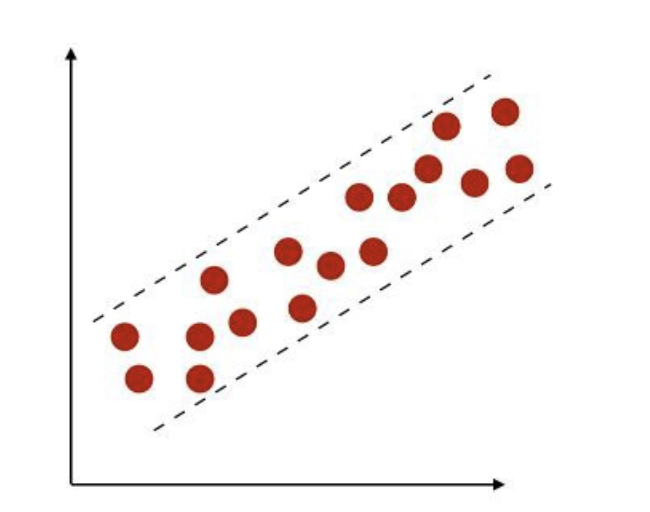|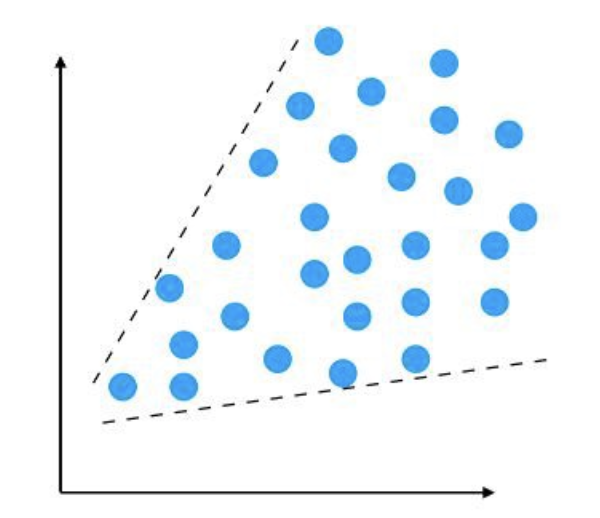|
|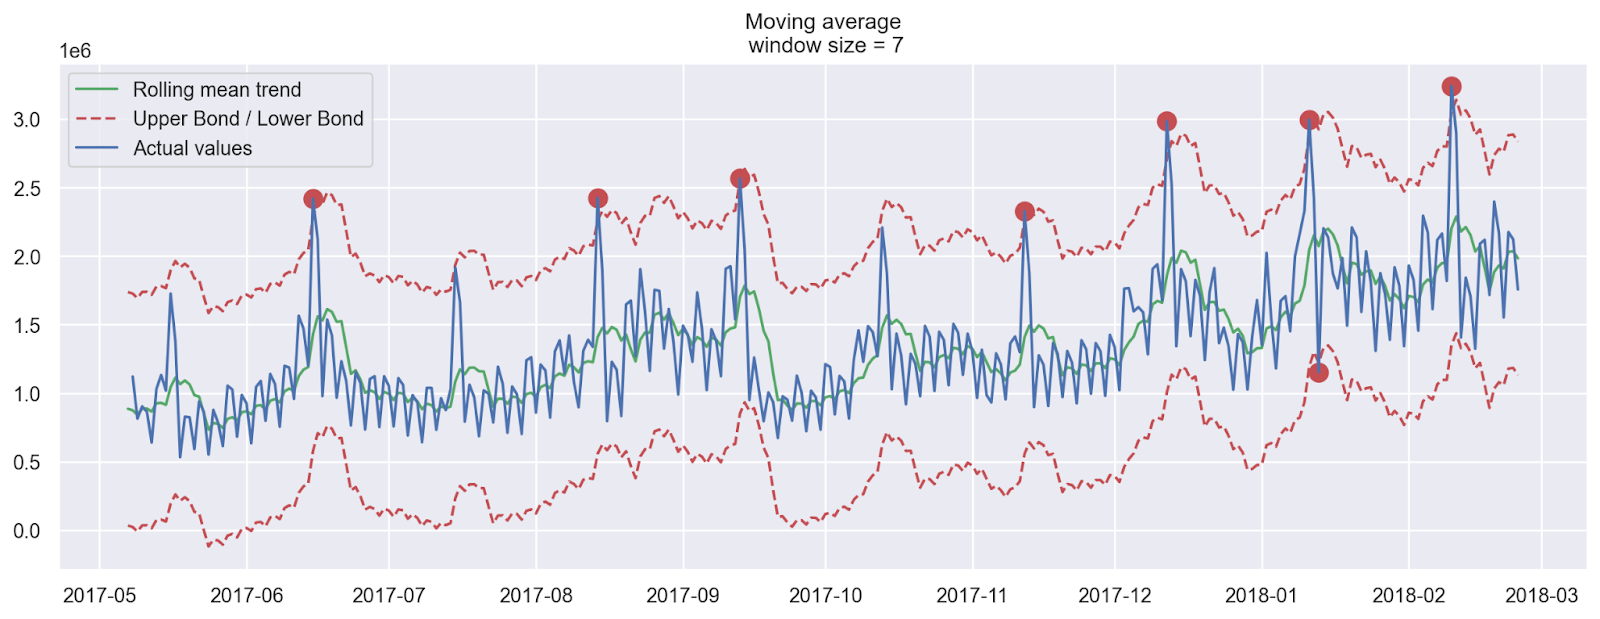|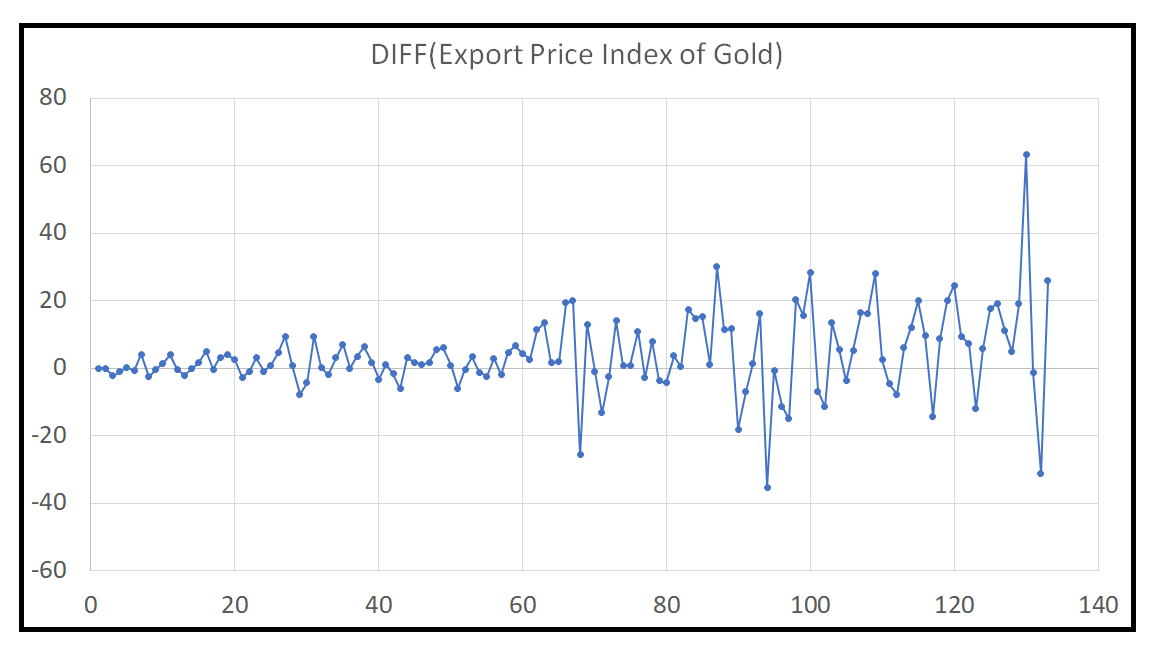|
|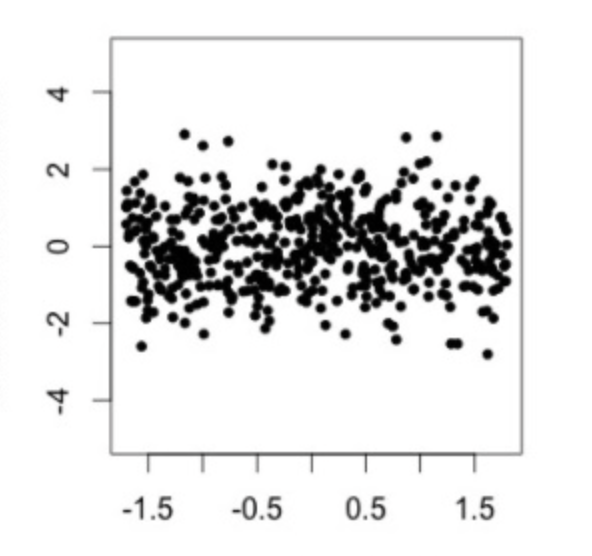|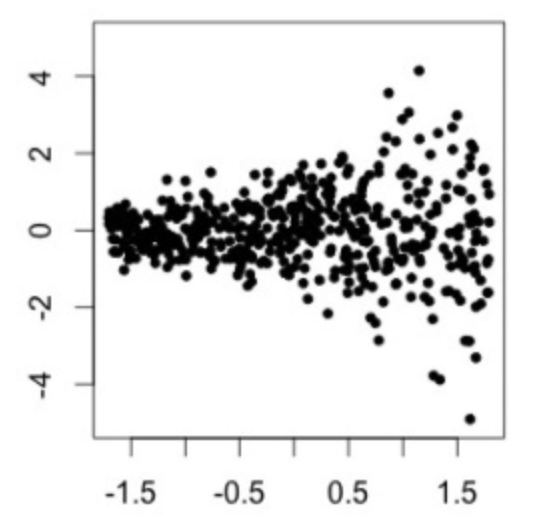|

**Волатильность** представляет собой меру риска использования финансового инструмента за заданный промежуток времени. Иными словами, волатильность показывает меру изменчивости и часто измеряется в процентах или долях. Предсказание волатильности, например, позволяет инвесторам определить риск приобретения финансового инструмента.

Для таких данных с непостоянной дисперсией был разработан ещё один класс моделей — семейство моделей авторегрессионной условной гетероскедастичности, или **ARCH (Autoregressive Conditional Heteroscedastic Model)**.

# <center>*ARCH* и *GARCH*
Ранее мы уже говорили, что модели семейства *ARMA* способны предсказывать тренд и сезонность, но, к сожалению, не изменчивость дисперсии. Модель *ARCH* была разработана лауреатом Нобелевской премии по экономике Робертом Энглом в 1982 г. для решения подобных проблем. В ней используется зависимая от времени условная дисперсия, которая выражается через квадрат предыдущих значений.
$$ \sigma^2(t) = a + \sum^q_{i=1} b_ir^2_{t-i} $$
Здесь $q$ — количество слагаемых, которые влияют на текущее значение, а $b$ — весовые коэффициенты, которые влияют на степень значимости предыдущих изменений дисперсии ($r$). То есть волатильность моделируется в виде суммы константы ($a$ — базовая волатильность, константа) и линейной функции абсолютных значений изменения нескольких последних цен.

Из-за квадрата в формуле волатильность предсказывается только в **абсолютном значении** (то есть по модулю).

Чуть позднее другой учёный, Тим Боллерслерв, предложил обобщённую концепцию модели *ARCH* — **GARCH (Generalized Autoregressive Conditional Heteroscedastic Model)**. Модель предполагала, что на изменчивость дисперсии влияют не только предыдущие изменения показателей, но и предыдущие оценки дисперсии (значение дисперсии).
$$ \sigma^2(t) = a + \sum^q_{i=1} b_ir^2_{t-i} + \sum^p_{j=1}c_j\sigma^2_{t-j} $$
* первая часть формулы — *ARCH*-модель;
* $p$ — количество оценок, предшествующих текущей, которые влияют на текущее значение;
* $c$ — это весовые коэффициенты, которые влияют на степень значимости предыдущих дисперсий ($\sigma^2$).

Как и в случае *AR*-моделей, эти коэффициенты настраиваются автоматически в процессе обучения.

**КОГДА ПРИМЕНЯТЬ ARCH И GARCH?**
* Когда ряд похож на белый шум, но при этом в нём присутствует гетероскедастичность.
Чтобы определить, является ли ряд гетероскедастичным (с меняющейся дисперсией), можно отобразить его квадраты на графике и понаблюдать за поведением дисперсии.

* Когда после применения *AR*-модели остатки (ошибки модели) тоже являются гетероскедастичными. В этом случае вы также можете прогнозировать дисперсию ошибок и использовать её в итоговом предсказании. Для этого необходимо суммировать результаты AR-модели с результатами ARCH.

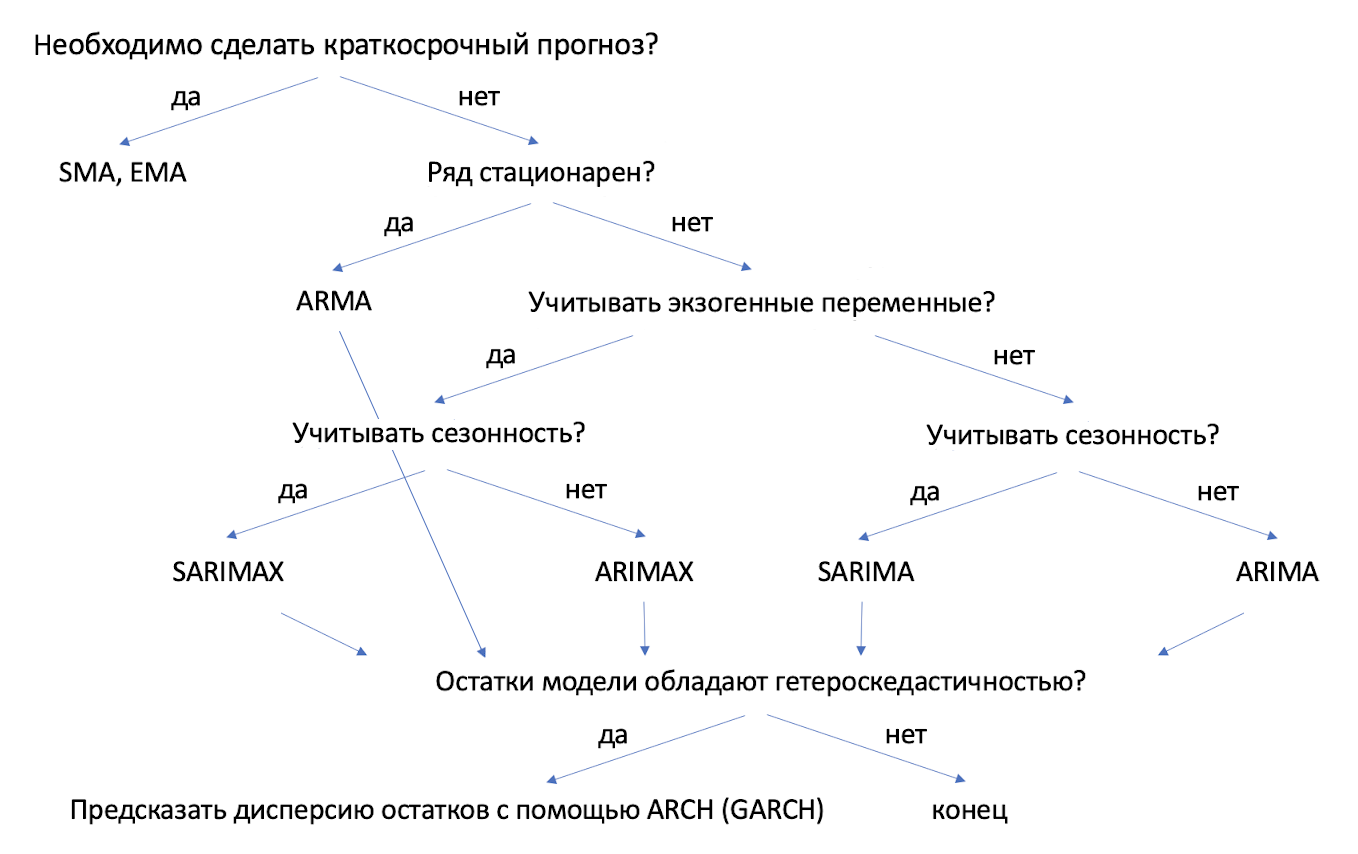

# <center>Валидация временных рядов
Метод `train_test_split` не подходит, так как он разбивает данные случайным образом. В результате нарушается временная связь между данными ряда.

Последовательное разбиение может выглядеть так:  
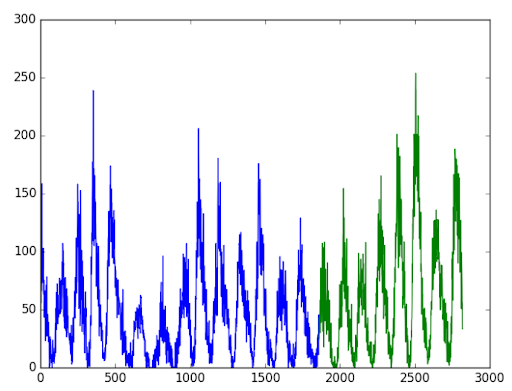

# <center>Кросс-валидация для временных рядов
Если использовать обычную кросс-валидацию, информация из будущего снова просочится в алгоритм. Поэтому вместо кросс-валидации используются:
* walk forward validation;
* множественное разбиение.

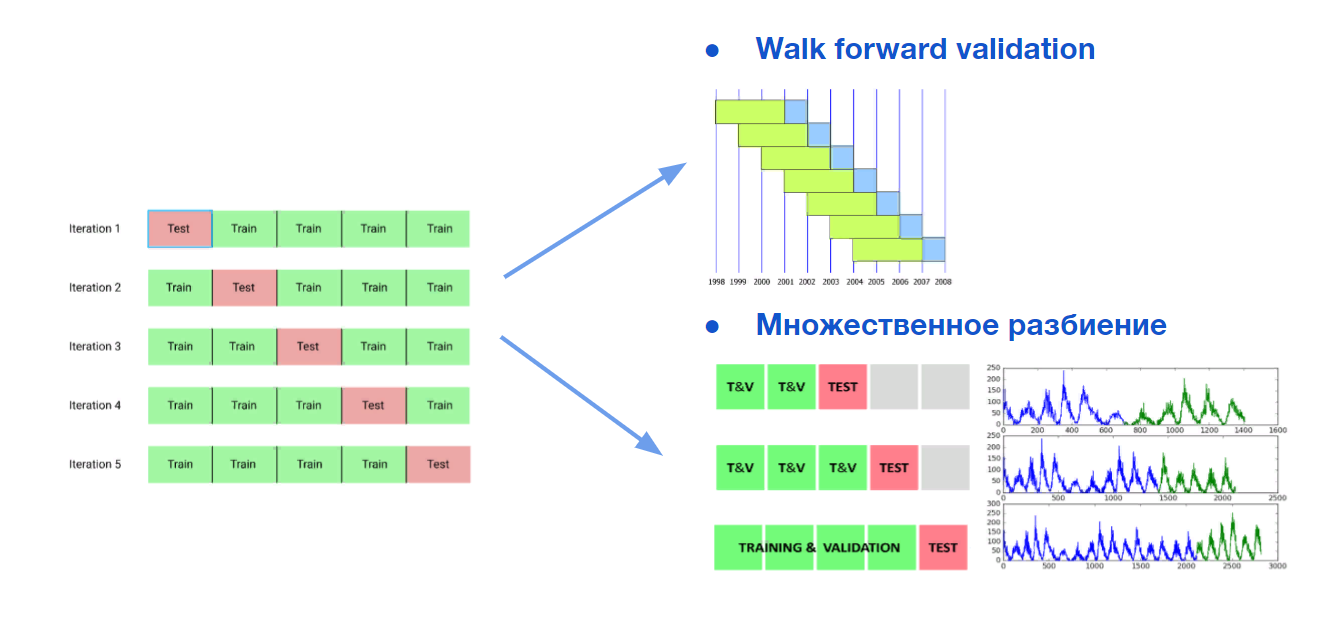  
В обоих случаях мы также соблюдаем последовательность в разбиении — сравните с обычной кросс-валидацией (слева). Оба разбиения действуют по схожему принципу — делят выборки упорядоченно, чтобы подвыборка test всегда выбиралась после подвыборок train. Отличием будет то, что в walk forward validation размер обучающих выборок во всех фолдах (разбиениях) будет одинаковым, а во множественном разбиении в каждом новом фолде данные обучающей выборки накапливаются.

